<a href="https://colab.research.google.com/github/bh-coding/Movie_Project/blob/main/Analyzing_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fun With Movies

The Internet Movie DataBase (imdb) has lots of great information we can use to practice pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

### First, import imdb.txt into colab (use the folder symbol to the left)

## Read in dataframe from .csv or .txt file

In [2]:
movies = pd.read_csv('imdb.txt')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


## What does the dataframe look like?

`shape` gives the number of rows and columns.

In [3]:
# check the number of rows and columns
print(movies.shape)
# check the data type of each column
movies.dtypes

(979, 6)


,0
star_rating,float64
title,object
content_rating,object
genre,object
duration,int64
actors_list,object


Now we can use the `mean()` function on any of the numerical columns.  Calculate and print out the average `duration` and `star_rating`. I've provided some sample code.

In [4]:
avg_duration = movies['duration'].mean()
star_rating = movies['star_rating'].mean()

We can select parts of the data in different ways. For example, we can look only at movies with a longer-than-average duration.

Notice that we use the test  `movies['duration'] > avg_duration`  to select just the long ones.

In [5]:
long_movies = movies[movies['duration'] > avg_duration]

#how do these movies rate?
long_movies['star_rating'].mean()


7.953669724770642

## TASK

Compare the mean rating of longer-than-average movies to the mean rating of shorter-than-average movies. In a comment, discuss whether longer movies get higher ratings.

In [6]:
short_movies = movies[movies['duration'] < avg_duration]
short_movies['star_rating'].mean()

7.838489871086555

## TASK

Use regex to select movies that are sequels.  For simplicity, we will just look at movies with `Part` and/or `II` and/or `III` in the title. I'll get you started.

In the last line, I show how to capture the ratings of just the movies that are sequels. Add these ratings to a list and call it `sequel_ratings`.

In [7]:

title_series = movies['title']
sequel_ratings = []
for title in title_series:
    if re.search('(Part\s|II|III)',title):   #this regex isnt' quite right. Fix it!
        print(title)
        idx = movies[movies['title']==title].index[0]  #index of the sequel
        print("rating is", movies['star_rating'][idx])  #add each rating to a list
        sequel_ratings.append(movies['star_rating'][idx])

The Godfather: Part II
rating is 9.1
Harry Potter and the Deathly Hallows: Part 2
rating is 8.1
Evil Dead II
rating is 7.8
Back to the Future Part II
rating is 7.8
Star Trek II: The Wrath of Khan
rating is 7.7
Harry Potter and the Deathly Hallows: Part 1
rating is 7.7
Star Wars: Episode III - Revenge of the Sith
rating is 7.7
The Godfather: Part III
rating is 7.6
Menace II Society
rating is 7.5
Clerks II
rating is 7.5
Back to the Future Part III
rating is 7.4


Clearly, there is a problem here. The movie `The Party` should not be included. Modify the regex search to exclude names like Party, but keep anything with Part. Also grab anything with a II or III.

Once you see only sequels, and you are getting `Evil Dead II` and other titles with II/III in it, you are ready to calculate the average rating.  Using your list `sequel_ratings`, compute the average rating.  How do the ratings compare to the average rating for the entire dataset?  

In [8]:
np.average(sequel_ratings)

7.8090909090909095

In [25]:
np.average(movies["star_rating"])

7.889785495403474

The average for the entire dataset is slightly higher at 7.89 compared to the sequels at 7.81.

## TASK - if you have time

Experiment with improving the regex selection to include other ways to indicate that a movie is a sequel. Can you collect other sequels without mistakenly capturing movies that are not sequels?


In [9]:
for title in title_series:
    if re.search('(Part\s|II|III|\s[2-9]|\s[0-9]{2})(:|$)',title):   # SAMPLE CODE - please improve
        print(title)
        idx = movies[movies['title']==title].index[0]  #index of the sequel
        print("rating is", movies['star_rating'][idx])
        sequel_ratings.append(movies['star_rating'][idx])  #add each rating to a list


The Godfather: Part II
rating is 9.1
Terminator 2: Judgment Day
rating is 8.5
Toy Story 3
rating is 8.4
Harry Potter and the Deathly Hallows: Part 2
rating is 8.1
Stalag 17
rating is 8.1
The Raid 2
rating is 8.1
Furious 7
rating is 8.0
Short Term 12
rating is 8.0
District 9
rating is 8.0
Kill Bill: Vol. 2
rating is 8.0
How to Train Your Dragon 2
rating is 8.0
Big Hero 6
rating is 7.9
Toy Story 2
rating is 7.9
Evil Dead II
rating is 7.8
Back to the Future Part II
rating is 7.8
Star Trek II: The Wrath of Khan
rating is 7.7
United 93
rating is 7.6
The Godfather: Part III
rating is 7.6
Mad Max 2: The Road Warrior
rating is 7.6
Apollo 13
rating is 7.6
Ip Man 2
rating is 7.6
Despicable Me 2
rating is 7.5
Clerks II
rating is 7.5
Back to the Future Part III
rating is 7.4


Question: how does the number of movies in different genres compare?

Action: 136
Adventure: 75
Animation: 62
Biography: 77
Comedy: 156
Crime: 124
Drama: 278
Family: 2
Fantasy: 1
Film-Noir: 3
History: 1
Horror: 29
Mystery: 16
Sci-Fi: 5
Thriller: 5
Western: 9


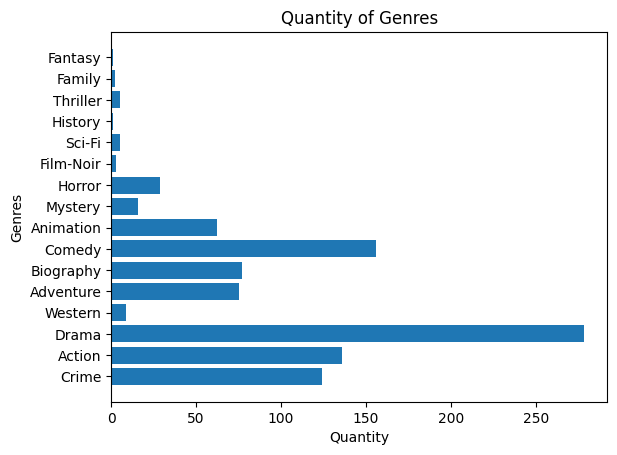

In [24]:
def ascii_histogram(seq) -> None: #create a histogram from a list of numbers
  counted = count_elements(seq) #generate frequency table (dictionary)
  for key in sorted(counted):
    plus_str = counted[key]
    print(f'{key}: {plus_str}') #prints out asterisk

def count_elements(seq): #creates a dictionary
  hist = dict()
  for date in seq:
    hist[date]=hist.get(date,0)+ 1
  return hist

genres = []
for item in movies["genre"]:
  genres.append(item)

#len(genres)
ascii_histogram(genres)
d = count_elements(genres)
n_bins = 8
fig, ax = plt.subplots()
ax.barh(list(d.keys()), list(d.values()))
ax.set(xlabel="Quantity",ylabel="Genres", title="Quantity of Genres")
plt.show()